In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

from hmmlearn import hmm

# **TO DO**

## How to find the AIC and BIC score for models
### Outcome - Why its best to try lots of different architectures to find one that best fits your data, and how to plot this
### However, still needs to be biologically relevant, don't just pick the best score

In [ ]:
# I can demonstrate how to do it with different architecture for a 4 state model. The student can create their own array for larger and smaller number of HMM states, all with a complete transition matrix choice

In [4]:
import pandas as pd
import numpy as np

df = pd.read_pickle(r'C:\Users\miles\Documents\HMM_tutorial\data\cleaned_data.pkl')

observables = ['immobile', 'micro', 'walking']


In [6]:
ar_data = df.groupby('id')['hmm'].apply(np.array)
ar_data = np.array(ar_data)

len_seq_all = [len(ar) for ar in ar_data]

seq_all = np.concatenate(ar_data, axis = 0) 
seq_all = seq_all.reshape(-1, 1)


In [7]:
# validating

from hmmlearn.hmm import CategoricalHMM

aic = []
bic = []
lls = []
ns = [2, 4, 6, 8]
for n in ns:
    print(f'Beginning training {n} states')
    best_ll = None
    best_model = None
    for i in range(10):
        h = CategoricalHMM(n_components = n,  n_iter = 10, tol = 10, n_features = len(observables), params = 'ste', init_params = 'ste') 
        h.fit(seq_all, len_seq_all)
        score = h.score(seq_all, len_seq_all)
        if not best_ll or best_ll < best_ll:
            best_ll = score
            best_model = h
    print(best_ll)
    aic.append(best_model.aic(seq_all, len_seq_all))
    bic.append(best_model.bic(seq_all, len_seq_all))
    lls.append(best_model.score(seq_all, len_seq_all))

Beginning training 2 states
-895052.270574227
Beginning training 4 states
-1199801.4244519721
Beginning training 6 states
-859306.3302792276
Beginning training 8 states
-874024.2211722266


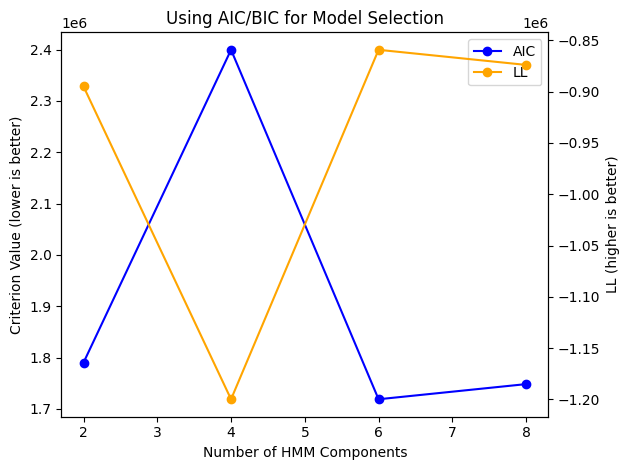

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ln1 = ax.plot(ns, aic, label="AIC", color="blue", marker="o")
# ln2 = ax.plot(ns, bic, label="BIC", color="green", marker="o")
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()

# Example plot, not real data
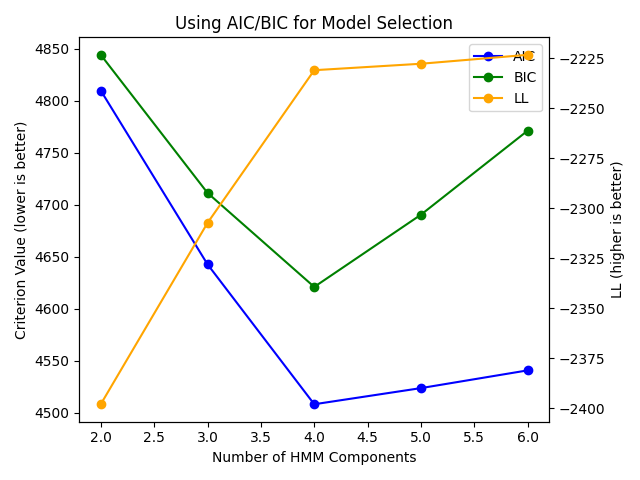

### Extra task - Try making a model with just moving and not moving - Test their scores against the 3 part model